# 最適化アルゴリズム比較

最適化アルゴリズムの比較  
単純に勾配の下り方を見ているので正確にはSGDではなかったりする.

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

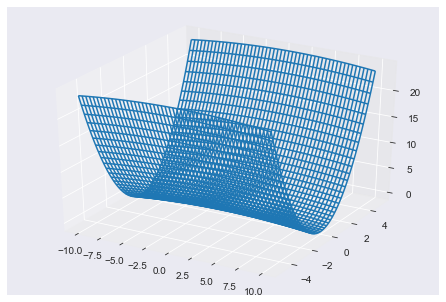

In [136]:
xx,yy = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-5, 5, 1000))
ff  = xx ** 2 / -100 + yy ** 2
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(xx, yy, ff)
plt.show()

def func(x):
    if len(x) != 2:
        raise ValueError('length must be 2')
    return x[0] ** 2 / -100 + x[1] ** 2

def grad_f(x):
    if len(x) != 2:
        raise ValueError('length must be 2')
    gx0 = 2 * x[0] / -100
    gx1 = 2 * x[1]
    return np.array([gx0, gx1])

# Parameter
epochs = 100000
x = np.array([1e-8, 1])

## SGD and MomentumSGD

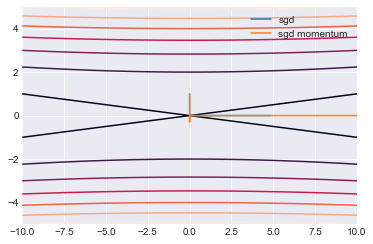

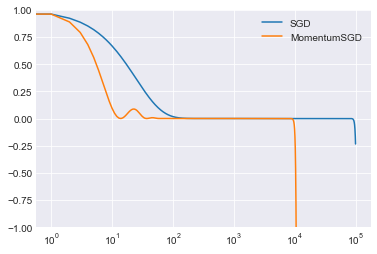

In [137]:
# Parameter
lr = 0.01
mt = 0.9
v = np.zeros(2)

sgd_x = np.zeros((epochs, 2))
sgdm_x = np.zeros((epochs, 2))
sgd_x[0] = x
sgdm_x[0] = x

sgd_f = np.zeros(epochs)
sgdm_f = np.zeros(epochs)
sgd_f[0] = func(x)
sgdm_f[0] = func(x)

for i in range(1, epochs):
    # sgd
    sgd_x[i] = sgd_x[i - 1] - lr * grad_f(sgd_x[i - 1])
    sgd_f[i] = func(sgd_x[i])
    # sgd momentum
    v = mt * v + lr * grad_f(sgdm_x[i - 1])
    sgdm_x[i] = sgdm_x[i - 1] - v
    sgdm_f[i] = func(sgdm_x[i])

plt.plot(sgd_x[:, 0], sgd_x[:, 1], label="sgd")
plt.plot(sgdm_x[:, 0], sgdm_x[:, 1], label="sgd momentum")
plt.legend()
plt.xlim(-10,10)
plt.contour(xx, yy, ff)
plt.show()

plt.plot(sgd_f,  label="SGD")
plt.plot(sgdm_f, label="MomentumSGD")
plt.ylim(-1, 1)
plt.xscale('log')
plt.legend()
plt.show()

## Adagrad

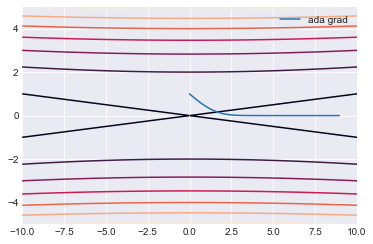

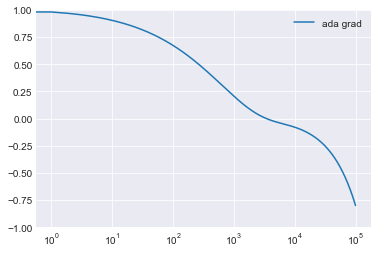

In [138]:
lr = 0.01
G = np.zeros(2)
eps = 1e-8

adag_x = np.zeros((epochs, 2))
adag_x[0] = x
adag_f = np.zeros(epochs)
adag_f[0] = func(x)

for i in range(1, epochs):
    # adagrad
    g = grad_f(adag_x[i - 1])
    G += g ** 2
    adag_x[i] = adag_x[i - 1] - g * lr / (np.sqrt(G) + eps)
    adag_f[i] = func(adag_x[i])
    
plt.plot(adag_x[:, 0], adag_x[:, 1], label="ada grad")
plt.legend()
plt.xlim(-10,10)
plt.contour(xx, yy, ff)
plt.show()

plt.plot(adag_f, label="ada grad")
plt.legend()
plt.ylim(-1, 1)
plt.xscale('log')
plt.show()

## adadelta

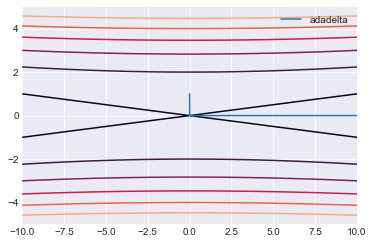

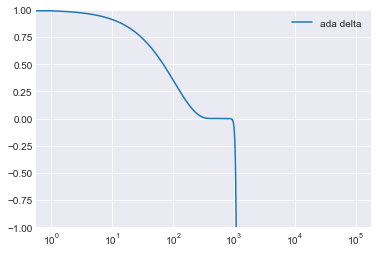

In [139]:
rho = 0.95
eps = 1e-6
Eg = np.zeros(2)
Edx = np.zeros(2)

adad_x = np.zeros((epochs, 2))
adad_x[0] = x
adad_f = np.zeros(epochs)
adad_f[0] = func(x)

for i in range(1, epochs):
    # adadelta
    g = grad_f(adad_x[i - 1])
    Eg = rho * Eg + (1 - rho) * g ** 2
    dx = np.sqrt((Edx + eps) / (Eg + eps)) * g
    adad_x[i] = adad_x[i - 1] - dx
    Edx =rho * Edx + (1 - rho) * dx ** 2
    adad_f[i] = func(adad_x[i])
    
plt.plot(adad_x[:, 0], adad_x[:, 1], label="adadelta")
plt.legend()
plt.xlim(-10,10)
plt.contour(xx, yy, ff)
plt.show()

plt.plot(adad_f, label="ada delta")
plt.legend()
plt.ylim(-1, 1)
plt.xscale('log')
plt.show()

## RMSprop

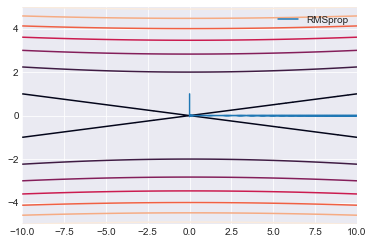

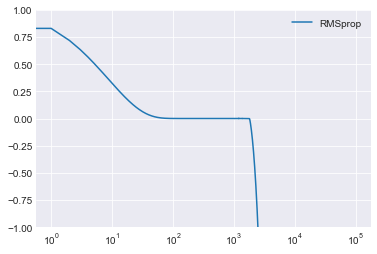

In [140]:
lr = 0.01
alpha = 0.99
eps = 1e-8

rmsp_x = np.zeros((epochs, 2))
rmsp_x[0] = x
rmsp_f = np.zeros(epochs)
rmsp_f[0] = func(x)

for i in range(1, epochs):
    # rmsprop
    g = grad_f(rmsp_x[i - 1])
    E2 = alpha * E2 + (1 - alpha) * g ** 2
    rmsp_x[i] = rmsp_x[i - 1] - g * lr / (np.sqrt(E2) + eps)
    rmsp_f[i] = func(rmsp_x[i])

plt.plot(rmsp_x[:, 0], rmsp_x[:, 1], label="RMSprop")
plt.legend()
plt.xlim(-10,10)
plt.contour(xx, yy, ff)
plt.show()

plt.plot(rmsp_f, label="RMSprop")
plt.legend()
plt.ylim(-1, 1)
plt.xscale('log')
plt.show()

## Adam

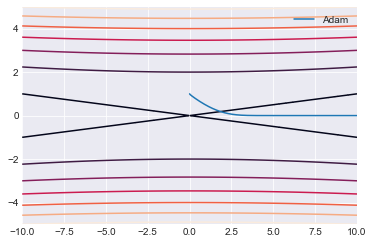

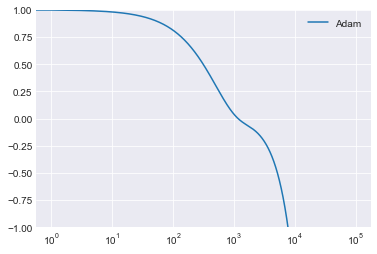

In [141]:
# Parameter
alpha = 0.001
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
m = np.zeros(2)
v = np.zeros(2)

adam_x = np.zeros((epochs, 2))
adam_x[0] = x
adam_f = np.zeros(epochs)
adam_f[0] = func(x)

adam_x = np.zeros((epochs, 2))
adam_x[0] = x
adam_f = np.zeros(epochs)
adam_f[0] = func(x)

for i in range(1, epochs):
    # adam
    g = grad_f(adam_x[i - 1])
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * g**2
    m2 = m / (1 - beta1**i)
    v2 = v / (1 - beta2**i)
    adam_x[i] = adam_x[i - 1] - m2 * alpha / (np.sqrt(v2) + ep)
    adam_f[i] = func(adam_x[i])

plt.plot(adam_x[:, 0], adam_x[:, 1], label="Adam")
plt.legend()
plt.xlim(-10,10)
plt.contour(xx, yy, ff)
plt.show()

plt.plot(adam_f, label="Adam")
plt.legend()
plt.ylim(-1, 1)
plt.xscale('log')
plt.show()

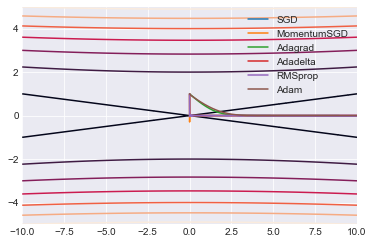

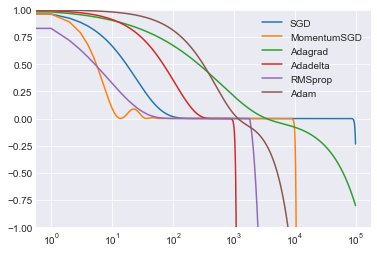

In [142]:
plt.plot(sgd_x[:, 0], sgd_x[:, 1], label="SGD")
plt.plot(sgdm_x[:, 0], sgdm_x[:, 1], label="MomentumSGD")
plt.plot(adag_x[:, 0], adag_x[:, 1], label="Adagrad")
plt.plot(adad_x[:, 0], adad_x[:, 1], label="Adadelta")
plt.plot(rmsp_x[:, 0], rmsp_x[:, 1], label="RMSprop")
plt.plot(adam_x[:, 0], adam_x[:, 1], label="Adam")
plt.legend()
plt.xlim(-10,10)
plt.contour(xx, yy, ff)
plt.show()

plt.plot(sgd_f,  label="SGD")
plt.plot(sgdm_f, label="MomentumSGD")
plt.plot(adag_f, label="Adagrad")
plt.plot(adad_f, label="Adadelta")
plt.plot(rmsp_f, label="RMSprop")
plt.plot(adam_f, label="Adam")
plt.legend()
plt.ylim(-1, 1)
plt.xscale('log')
plt.show()